In [1]:
# 필요한 라이브러리를 불러옴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import os

In [2]:
# 지정 폴더의 모든 파일을 불러옵니다.
folder = './one/'
files = os.listdir(folder)

In [3]:
# 불러온 csv 파일들을 하나의 DataFrame으로 합치기
df = pd.DataFrame()
for i in files:
    data = pd.read_csv(folder + i)
    df = pd.concat([df,data])
    
df = df.reset_index(drop = True)

In [4]:
# 풀러온 데이터 확인
df

,No.,15IV B,16IV G,17IV R,8VF B,9VF G,10VF R,11LMD B,12LMD G,13LMD R
0,22102,2.1144,8.844,7.053,3.319,3.565,2.391,458.0,524.3,621.5
1,22103,2.0586,8.418,7.041,3.195,3.582,2.551,458.2,524.4,621.6
2,22104,2.1672,8.891,7.054,3.174,3.713,2.546,458.5,525.0,621.5
3,22105,2.1331,8.791,7.191,3.158,3.513,2.589,458.1,524.1,621.0
4,22106,2.1313,8.718,7.213,3.110,3.604,2.579,458.0,524.3,620.8
...,...,...,...,...,...,...,...,...,...,...
22426,89281,2.1340,8.833,7.066,3.372,3.608,2.451,458.3,524.0,621.4
22427,89282,2.1547,9.036,7.101,3.166,3.605,2.416,458.7,525.5,621.1
22428,89283,2.1755,8.670,7.177,3.121,3.484,2.421,458.4,524.8,620.7
22429,89284,2.1101,8.753,7.023,3.298,3.399,2.406,457.9,524.0,621.4


In [5]:
# 불필요한 column을 삭제. No, BIN, NAME
# df1 = df.drop(columns=["2VF1 B", "3VF1 G", "4VF1 R", "No.", " BIN", "NAME"])
df1 = df.drop(columns=["No."])

In [6]:
# 데이터 확인
df1

,15IV B,16IV G,17IV R,8VF B,9VF G,10VF R,11LMD B,12LMD G,13LMD R
0,2.1144,8.844,7.053,3.319,3.565,2.391,458.0,524.3,621.5
1,2.0586,8.418,7.041,3.195,3.582,2.551,458.2,524.4,621.6
2,2.1672,8.891,7.054,3.174,3.713,2.546,458.5,525.0,621.5
3,2.1331,8.791,7.191,3.158,3.513,2.589,458.1,524.1,621.0
4,2.1313,8.718,7.213,3.110,3.604,2.579,458.0,524.3,620.8
...,...,...,...,...,...,...,...,...,...
22426,2.1340,8.833,7.066,3.372,3.608,2.451,458.3,524.0,621.4
22427,2.1547,9.036,7.101,3.166,3.605,2.416,458.7,525.5,621.1
22428,2.1755,8.670,7.177,3.121,3.484,2.421,458.4,524.8,620.7
22429,2.1101,8.753,7.023,3.298,3.399,2.406,457.9,524.0,621.4


In [7]:
# column 이름 변경
df1.columns = ["IV_B", "IV_G", "IV_R", "VF_B", "VF_G", "VF_R", "WD_B", "WD_G", "WD_R", ]

In [8]:
# 정보 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22431 entries, 0 to 22430
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IV_B    22431 non-null  float64
 1   IV_G    22431 non-null  float64
 2   IV_R    22431 non-null  float64
 3   VF_B    22431 non-null  float64
 4   VF_G    22431 non-null  float64
 5   VF_R    22431 non-null  float64
 6   WD_B    22431 non-null  float64
 7   WD_G    22431 non-null  float64
 8   WD_R    22431 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


In [9]:
# 결측치를 제거
df2 = df1.dropna()

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22431 entries, 0 to 22430
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IV_B    22431 non-null  float64
 1   IV_G    22431 non-null  float64
 2   IV_R    22431 non-null  float64
 3   VF_B    22431 non-null  float64
 4   VF_G    22431 non-null  float64
 5   VF_R    22431 non-null  float64
 6   WD_B    22431 non-null  float64
 7   WD_G    22431 non-null  float64
 8   WD_R    22431 non-null  float64
dtypes: float64(9)
memory usage: 1.7 MB


In [11]:
df2.describe()

# max = 5, min = 0으로 이상치가 있음을 확인 할수 있음

,IV_B,IV_G,IV_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
count,22431.00000,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000
mean,2.12907,8.819726,6.952474,3.206621,3.540426,2.433497,457.249726,523.460974,619.439102
std,0.07919,0.291609,0.211274,0.122438,0.178114,0.157936,20.048387,28.874678,32.348959
min,0.00000,0.000000,0.000000,3.031000,3.255000,0.207000,0.000000,0.000000,0.000000
25%,2.08720,8.737000,6.891000,3.134000,3.408000,2.370000,457.700000,524.500000,620.900000
50%,2.12030,8.826000,6.963000,3.185000,3.483000,2.418000,458.000000,525.000000,621.200000
75%,2.16270,8.912000,7.039000,3.251000,3.635000,2.464000,458.400000,525.600000,621.400000
max,2.50810,9.882000,7.286000,5.000000,5.000000,5.000000,460.900000,526.900000,622.200000


In [12]:
# 이상값을 결측치로 대체 후 결측치 제거
# 이상갑 확인후 결측치로 대체
quartile_1 = df2[:].quantile(0.25)
quartile_3 = df2[:].quantile(0.75)
IQR = quartile_3 - quartile_1
lls = (quartile_1 - 1.5 * IQR)
hls = (quartile_3 + 1.5 * IQR)
df3 = df2[(df2[:] > lls) & (df2[:] < hls)]
print(df3)

         IV_B   IV_G   IV_R   VF_B   VF_G   VF_R   WD_B   WD_G   WD_R
0      2.1144  8.844  7.053  3.319  3.565  2.391  458.0  524.3  621.5
1      2.0586    NaN  7.041  3.195  3.582  2.551  458.2  524.4  621.6
2      2.1672  8.891  7.054  3.174  3.713  2.546  458.5  525.0  621.5
3      2.1331  8.791  7.191  3.158  3.513  2.589  458.1  524.1  621.0
4      2.1313  8.718  7.213  3.110  3.604  2.579  458.0  524.3  620.8
...       ...    ...    ...    ...    ...    ...    ...    ...    ...
22426  2.1340  8.833  7.066  3.372  3.608  2.451  458.3  524.0  621.4
22427  2.1547  9.036  7.101  3.166  3.605  2.416  458.7  525.5  621.1
22428  2.1755  8.670  7.177  3.121  3.484  2.421  458.4  524.8  620.7
22429  2.1101  8.753  7.023  3.298  3.399  2.406  457.9  524.0  621.4
22430  2.1105  8.598  6.973  3.214  3.379  2.440  458.0  525.3  621.4

[22431 rows x 9 columns]


In [13]:
# 결측치를 제거
df4 = df3.dropna()

In [14]:
# 데이터 확인
df4.describe()

,IV_B,IV_G,IV_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
count,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000
mean,2.122424,8.822126,6.965003,3.195383,3.526999,2.415984,458.048478,525.058764,621.126851
std,0.052987,0.132664,0.103444,0.078220,0.147107,0.068051,0.457077,0.718784,0.306636
min,1.974700,8.475000,6.670000,3.033000,3.313000,2.275000,457.200000,523.000000,620.300000
25%,2.086800,8.737000,6.895000,3.135000,3.407000,2.367000,457.700000,524.500000,620.900000
50%,2.117600,8.826000,6.965000,3.183000,3.477000,2.415000,458.000000,525.000000,621.200000
75%,2.155000,8.907000,7.041000,3.244000,3.624000,2.456000,458.300000,525.700000,621.400000
max,2.275800,9.174000,7.257000,3.426000,3.975000,2.604000,459.400000,526.900000,622.100000


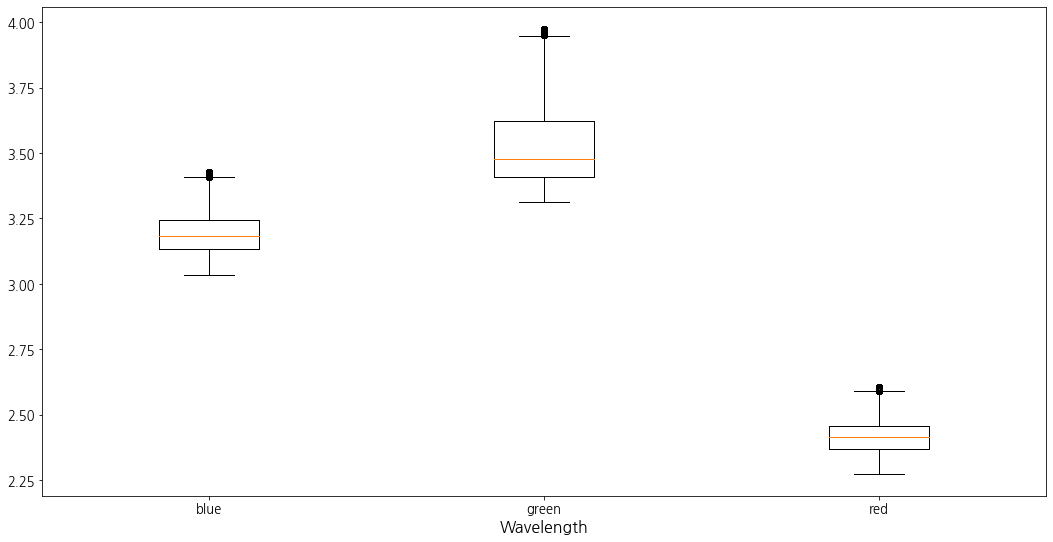

In [15]:
# VF 특성 상자그림
plt.figure(figsize = (18,9))
plt.boxplot([df4['VF_B'],df4['VF_G'],df4['VF_R']], labels = ['blue','green','red'], vert=True)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Wavelength", fontsize = 16)
plt.show()

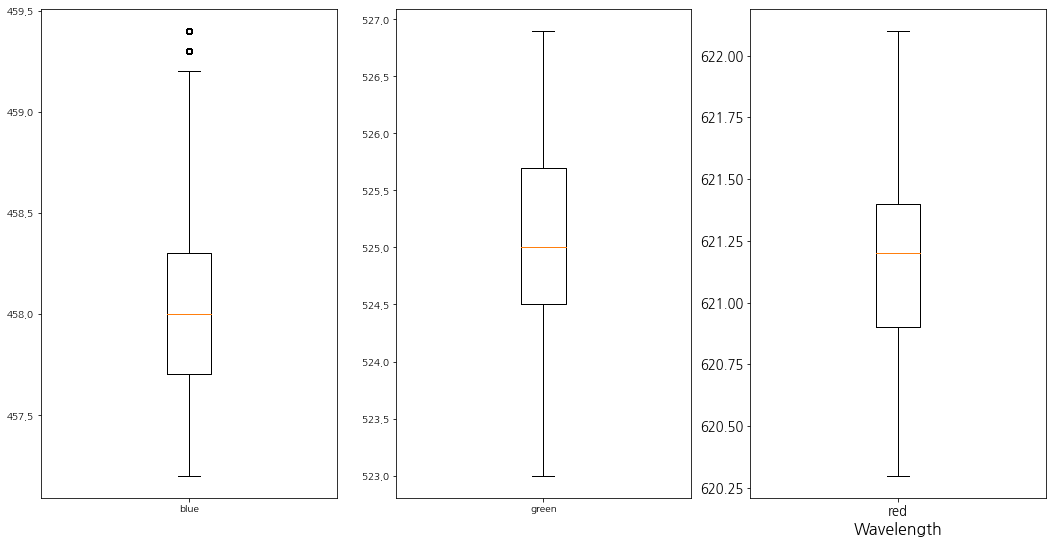

In [16]:
# 파장 특성 상자그림
fig = plt.figure(figsize=(18,9))   # 한 화면의 크기 만들기
ax1 = fig.add_subplot(1,3,1)     # 1행 2열 그림중 1번째
ax2 = fig.add_subplot(1,3,2)     # 1행 2열 그림중 2번째
ax3 = fig.add_subplot(1,3,3)     # 1행 3열 그림중 2번째

ax1.boxplot([df4['WD_B']], labels = ['blue'], vert=True)
ax2.boxplot(df4['WD_G'], labels = ['green'], vert=True)
ax3.boxplot(df4['WD_R'], labels = ['red'], vert=True)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Wavelength", fontsize = 16)
plt.show()

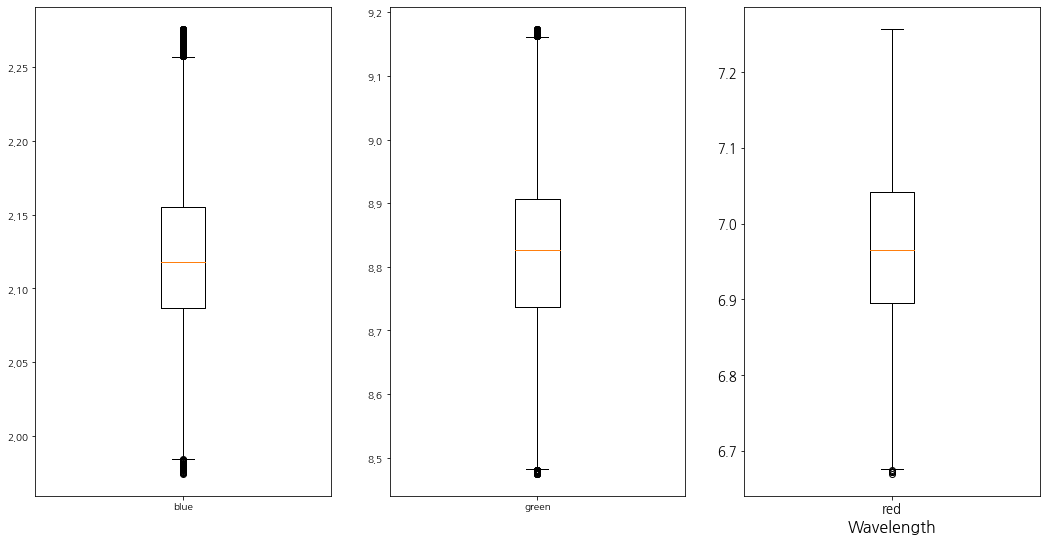

In [17]:
# IV 특성 상자그림
fig = plt.figure(figsize=(18,9))   # 한 화면의 크기 만들기
ax1 = fig.add_subplot(1,3,1)     # 1행 2열 그림중 1번째
ax2 = fig.add_subplot(1,3,2)     # 1행 2열 그림중 2번째
ax3 = fig.add_subplot(1,3,3)     # 1행 3열 그림중 2번째

ax1.boxplot([df4['IV_B']], labels = ['blue'], vert=True)
ax2.boxplot(df4['IV_G'], labels = ['green'], vert=True)
ax3.boxplot(df4['IV_R'], labels = ['red'], vert=True)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Wavelength", fontsize = 16)
plt.show()

## 공정 능력 확인

In [18]:
# 공정 능력 확인을 위한 spec.이 담긴 file을 불러옴
spec = pd.read_csv('./spec/spec.csv')
spec

,No.,15IV B,16IV G,17IV R,8VF B,9VF G,10VF R,11LMD B,12LMD G,13LMD R
0,Lower,1.8cd,7.5cd,5.00cd,2.8V,2.8V,1.9V,456nm,519nm,619nm
1,Upper,3.6cd,16.5cd,12.25cd,3.6V,3.6V,2.5V,465nm,533nm,628nm


In [19]:
# 파일에 담진 내용이 샘플 데이터와 옹일해서 불필요한 column을 제거
spec1 = spec.drop(columns=["No."])
spec1

,15IV B,16IV G,17IV R,8VF B,9VF G,10VF R,11LMD B,12LMD G,13LMD R
0,1.8cd,7.5cd,5.00cd,2.8V,2.8V,1.9V,456nm,519nm,619nm
1,3.6cd,16.5cd,12.25cd,3.6V,3.6V,2.5V,465nm,533nm,628nm


In [20]:
# column 이름 변경
spec1.columns = ["IV_B", "IV_G", "IV_R", "VF_B", "VF_G", "VF_R", "WD_B", "WD_G", "WD_R" ]
spec1.index = ["LSL", "USL"]
spec1

,IV_B,IV_G,IV_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
LSL,1.8cd,7.5cd,5.00cd,2.8V,2.8V,1.9V,456nm,519nm,619nm
USL,3.6cd,16.5cd,12.25cd,3.6V,3.6V,2.5V,465nm,533nm,628nm


In [21]:
# 측정 단위 제거
# 측정 결과에는 단위가 없이 float 형태이므로 동일한 형식으로 맞추기 위해 문자 제거후 float형식으로 변경
spec1[:] = spec1[:].replace('cd', '', regex=True)
spec1[:] = spec1[:].replace('V', '', regex=True)
spec1[:] = spec1[:].replace('nm', '', regex=True)
spec1

,IV_B,IV_G,IV_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
LSL,1.8,7.5,5.00,2.8,2.8,1.9,456,519,619
USL,3.6,16.5,12.25,3.6,3.6,2.5,465,533,628


In [22]:
# 공정능력 검토를 위해서는 상한, 하한 spec.과 target value 필요함
# 주어진 자료에 target값이 없으므로 - 임시로 검토 측정 data의 평균값으로 target 값을 대체 - 추가
mean = []
avg = df4[:].mean()
mean.append(avg)
spec1 = spec1.append(mean)
spec1

,IV_B,IV_G,IV_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
LSL,1.8,7.5,5.00,2.8,2.8,1.9,456,519,619
USL,3.6,16.5,12.25,3.6,3.6,2.5,465,533,628
0,2.122424,8.822126,6.965003,3.195383,3.526999,2.415984,458.048478,525.058764,621.126851


In [23]:
# 데이터 형태 확인
spec1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, LSL to 0
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IV_B    3 non-null      object
 1   IV_G    3 non-null      object
 2   IV_R    3 non-null      object
 3   VF_B    3 non-null      object
 4   VF_G    3 non-null      object
 5   VF_R    3 non-null      object
 6   WD_B    3 non-null      object
 7   WD_G    3 non-null      object
 8   WD_R    3 non-null      object
dtypes: object(9)
memory usage: 240.0+ bytes


In [24]:
# object이므로 float64 형태로 변경 필요
spec1 = spec1[["IV_B", "IV_G", "IV_R", "VF_B", "VF_G", "VF_R", "WD_B", "WD_G", "WD_R" ]] = spec1[["IV_B", "IV_G", "IV_R", "VF_B", "VF_G", "VF_R", "WD_B", "WD_G", "WD_R" ]].apply(pd.to_numeric)
spec1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, LSL to 0
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IV_B    3 non-null      float64
 1   IV_G    3 non-null      float64
 2   IV_R    3 non-null      float64
 3   VF_B    3 non-null      float64
 4   VF_G    3 non-null      float64
 5   VF_R    3 non-null      float64
 6   WD_B    3 non-null      float64
 7   WD_G    3 non-null      float64
 8   WD_R    3 non-null      float64
dtypes: float64(9)
memory usage: 240.0+ bytes


In [25]:
# index 이름 변경
spec1.index = ["LSL", "USL", "MEAN"]
spec1

,IV_B,IV_G,IV_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
LSL,1.800000,7.500000,5.000000,2.800000,2.800000,1.900000,456.000000,519.000000,619.000000
USL,3.600000,16.500000,12.250000,3.600000,3.600000,2.500000,465.000000,533.000000,628.000000
MEAN,2.122424,8.822126,6.965003,3.195383,3.526999,2.415984,458.048478,525.058764,621.126851


In [26]:
# Spec. data, 검토 data 확인
print(spec1)
print(df4)

          IV_B       IV_G       IV_R      VF_B      VF_G      VF_R  \
LSL   1.800000   7.500000   5.000000  2.800000  2.800000  1.900000   
USL   3.600000  16.500000  12.250000  3.600000  3.600000  2.500000   
MEAN  2.122424   8.822126   6.965003  3.195383  3.526999  2.415984   

            WD_B        WD_G        WD_R  
LSL   456.000000  519.000000  619.000000  
USL   465.000000  533.000000  628.000000  
MEAN  458.048478  525.058764  621.126851  
         IV_B   IV_G   IV_R   VF_B   VF_G   VF_R   WD_B   WD_G   WD_R
0      2.1144  8.844  7.053  3.319  3.565  2.391  458.0  524.3  621.5
2      2.1672  8.891  7.054  3.174  3.713  2.546  458.5  525.0  621.5
3      2.1331  8.791  7.191  3.158  3.513  2.589  458.1  524.1  621.0
4      2.1313  8.718  7.213  3.110  3.604  2.579  458.0  524.3  620.8
5      2.1312  8.918  6.876  3.279  3.424  2.364  458.0  526.2  621.2
...       ...    ...    ...    ...    ...    ...    ...    ...    ...
22426  2.1340  8.833  7.066  3.372  3.608  2.451  458.3  

In [27]:
# spec. 을 각각 값으로 분리

# spec. 설정 (min, max, target(mean))
LSL_IB, USL_IB, MEAN_IB = spec1.iat[0,0], spec1.iat[1,0], spec1.iat[2,0]
LSL_IG, USL_IG, MEAN_IG = spec1.iat[0,1], spec1.iat[1,1], spec1.iat[2,1]
LSL_IR, USL_IR, MEAN_IR = spec1.iat[0,2], spec1.iat[1,2], spec1.iat[2,2]
print(LSL_IB, USL_IB, MEAN_IB, LSL_IG, USL_IG, MEAN_IG, LSL_IR, USL_IR, MEAN_IR)

LSL_VB, USL_VB, MEAN_VB = spec1.iat[0,3], spec1.iat[1,3], spec1.iat[2,3]
LSL_VG, USL_VG, MEAN_VG = spec1.iat[0,4], spec1.iat[1,4], spec1.iat[2,4]
LSL_VR, USL_VR, MEAN_VR = spec1.iat[0,5], spec1.iat[1,5], spec1.iat[2,5]
print(LSL_VB, USL_VB, MEAN_VB, LSL_VG, USL_VG, MEAN_VG, LSL_VR, USL_VR, MEAN_VR)

LSL_WB, USL_WB, MEAN_WB = spec1.iat[0,6], spec1.iat[1,6], spec1.iat[2,6]
LSL_WG, USL_WG, MEAN_WG = spec1.iat[0,7], spec1.iat[1,7], spec1.iat[2,7]
LSL_WR, USL_WR, MEAN_WR = spec1.iat[0,8], spec1.iat[1,8], spec1.iat[2,8]
print(LSL_WB, USL_WB, MEAN_WB, LSL_WG, USL_WG, MEAN_WG, LSL_WR, USL_WR, MEAN_WR)

1.8 3.6 2.122424152290304 7.5 16.5 8.822126007246789 5.0 12.25 6.9650031907414345
2.8 3.6 3.19538342977665 2.8 3.6 3.526999134714189 1.9 2.5 2.4159841544535112
456.0 465.0 458.0484776377625 519.0 533.0 525.0587637228889 619.0 628.0 621.1268509004966


In [28]:
df4.describe()

,IV_B,IV_G,IV_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
count,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000
mean,2.122424,8.822126,6.965003,3.195383,3.526999,2.415984,458.048478,525.058764,621.126851
std,0.052987,0.132664,0.103444,0.078220,0.147107,0.068051,0.457077,0.718784,0.306636
min,1.974700,8.475000,6.670000,3.033000,3.313000,2.275000,457.200000,523.000000,620.300000
25%,2.086800,8.737000,6.895000,3.135000,3.407000,2.367000,457.700000,524.500000,620.900000
50%,2.117600,8.826000,6.965000,3.183000,3.477000,2.415000,458.000000,525.000000,621.200000
75%,2.155000,8.907000,7.041000,3.244000,3.624000,2.456000,458.300000,525.700000,621.400000
max,2.275800,9.174000,7.257000,3.426000,3.975000,2.604000,459.400000,526.900000,622.100000


## Blue Chip Sorting 공정 능력 cp, cpk

### Luminous Intensity _ Blue

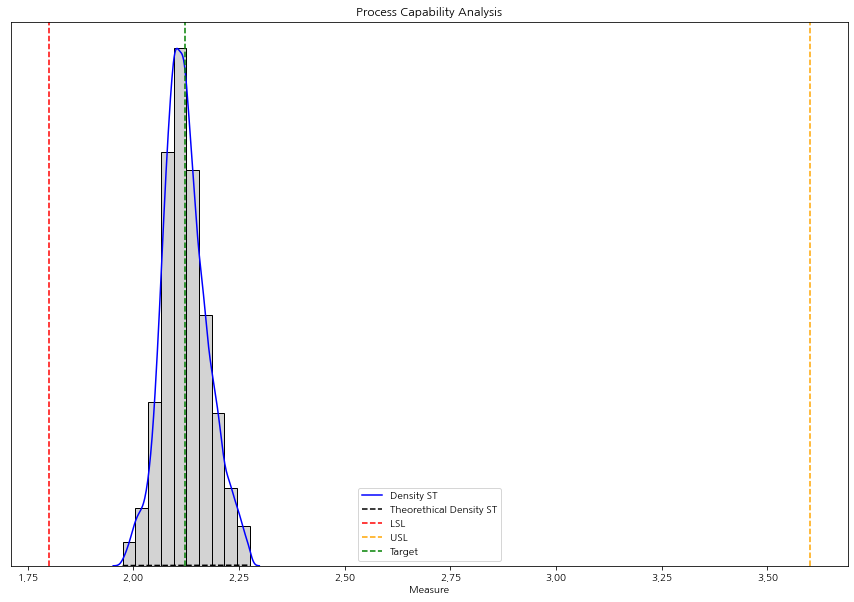

In [29]:
# Generate probability density function 
x = np.linspace((df4['IV_B'].min()), (df4['IV_B'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['IV_B'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['IV_B'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_IB, linestyle="--", color="red", label="LSL")
plt.axvline(USL_IB, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_IB, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [30]:
# Calculate Cp
Cp = (USL_IB-LSL_IB)/(6*np.std(df4['IV_B']))
# Calculate Cpk
Cpk = min((USL_IB-df4['IV_B'].mean())/(3*df4['IV_B'].std()), (df4['IV_B'].mean()-LSL_IB)/(3*df4['IV_B'].std()))
# Calculate z-value
z = min((USL_IB-df4['IV_B'].mean())/(df4['IV_B'].std()), (df4['IV_B'].mean()-LSL_IB)/(df4['IV_B'].std()))
# Get data summary statistics
num_samples = len(df4['IV_B'])
sample_mean = df4['IV_B'].mean()
sample_std = df4['IV_B'].std()
sample_max = df4['IV_B'].max()
sample_min = df4['IV_B'].min()
sample_median = np.median(df4['IV_B'])

# Get percentage of data points outside of specification limits
pct_below_LSL_IB = len(df4['IV_B'][df4['IV_B'] < LSL_IB])/len(df4['IV_B'])*100
pct_above_USL_IB = len(df4['IV_B'][df4['IV_B'] > USL_IB])/len(df4['IV_B'])*100

# Write .txt file with results
with open('process_results.txt', "w") as results:
    results.write("PROCESS CAPABILITY ANALYSIS\n")
    
    print("-----------------------------------")
    print(f"Specifications")
    print(f"Taget: {MEAN_IB}")
    print(f"LSL: {LSL_IB}")
    print(f"USL: {USL_IB}")    
    
    print("-----------------------------------")
    print(f"Indices")
    print(f"Cp: {round(Cp,2)}")
    print(f"Cpk: {round(Cpk,2)}")
    print(f"z: {round(z,2)}")
    
    print("-----------------------------------")
    print(f"Summary Statistics")
    print(f"Number of samples: {round(num_samples,2)}")
    print(f"Sample mean: {round(sample_mean,2)}")
    print(f"Sample std: {round(sample_std,2)}")
    print(f"Sample max: {round(sample_max,2)}")
    print(f"Sample min: {round(sample_min,2)}")
    print(f"Sample median: {round(sample_median,2)}")
    
    print(f"Percentage of data points below LSL: {round(pct_below_LSL_IB,2)}%")
    print(f"Percentage of data points above USL: {round(pct_above_USL_IB,2)}%")

-----------------------------------
Specifications
Taget: 2.122424152290304
LSL: 1.8
USL: 3.6
-----------------------------------
Indices
Cp: 5.66
Cpk: 2.03
z: 6.08
-----------------------------------
Summary Statistics
Number of samples: 18491
Sample mean: 2.12
Sample std: 0.05
Sample max: 2.28
Sample min: 1.97
Sample median: 2.12
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.0%


### Forward Voltage _ Blue

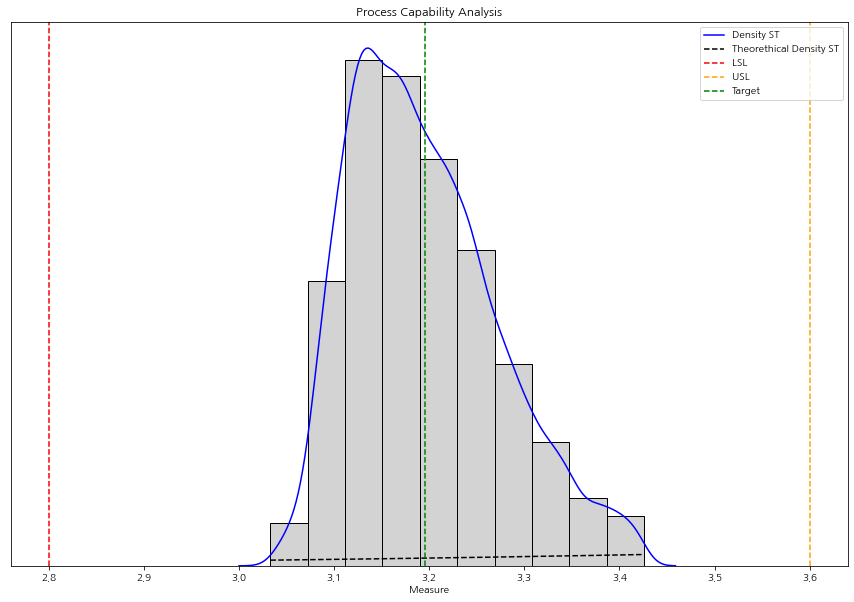

In [31]:
# Blue VF 특성의 공정 능력

# Generate probability density function 
x = np.linspace((df4['VF_B'].min()), (df4['VF_B'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['VF_B'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['VF_B'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_VB, linestyle="--", color="red", label="LSL")
plt.axvline(USL_VB, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_VB, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [32]:
# Calculate Cp
Cp = (USL_VB-LSL_VB)/(6*np.std(df4['VF_B']))
# Calculate Cpk
Cpk = min((USL_VB-df4['VF_B'].mean())/(3*df4['VF_B'].std()), (df4['VF_B'].mean()-LSL_VB)/(3*df4['VF_B'].std()))
# Calculate z-value
z = min((USL_VB-df4['VF_B'].mean())/(df4['VF_B'].std()), (df4['VF_B'].mean()-LSL_VB)/(df4['VF_B'].std()))

# Get data summary statistics
num_samples = len(df4['VF_B'])
sample_mean = df4['VF_B'].mean()
sample_std = df4['VF_B'].std()
sample_max = df4['VF_B'].max()
sample_min = df4['VF_B'].min()
sample_median = np.median(df4['VF_B'])

# Get percentage of data points outside of specification limits
pct_below_LSL_VB = len(df4['VF_B'][df4['VF_B'] < LSL_VB])/len(df4['VF_B'])*100
pct_above_USL_VB = len(df4['VF_B'][df4['VF_B'] > USL_VB])/len(df4['VF_B'])*100

# Write .txt file with results
with open('process_results.txt', "w") as results:
    results.write("PROCESS CAPABILITY ANALYSIS")
    
    print("-----------------------------------")
    print(f"Specifications")
    print(f"Taget: {MEAN_VB}")
    print(f"LSL: {LSL_VB}")
    print(f"USL: {USL_VB}")    
    
    print("-----------------------------------")
    print(f"Indices")
    print(f"Cp: {round(Cp,2)}")
    print(f"Cpk: {round(Cpk,2)}")
    print(f"z: {round(z,2)}")
    
    print("-----------------------------------")
    print(f"Summary Statistics")
    print(f"Number of samples: {round(num_samples,2)}")
    print(f"Sample mean: {round(sample_mean,2)}")
    print(f"Sample std: {round(sample_std,2)}")
    print(f"Sample max: {round(sample_max,2)}")
    print(f"Sample min: {round(sample_min,2)}")
    print(f"Sample median: {round(sample_median,2)}")
    
    print(f"Percentage of data points below LSL: {round(pct_below_LSL_VB,2)}%")
    print(f"Percentage of data points above USL: {round(pct_above_USL_VB,2)}%")

-----------------------------------
Specifications
Taget: 3.19538342977665
LSL: 2.8
USL: 3.6
-----------------------------------
Indices
Cp: 1.7
Cpk: 1.68
z: 5.05
-----------------------------------
Summary Statistics
Number of samples: 18491
Sample mean: 3.2
Sample std: 0.08
Sample max: 3.43
Sample min: 3.03
Sample median: 3.18
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.0%


### Wavelenght _ Blue

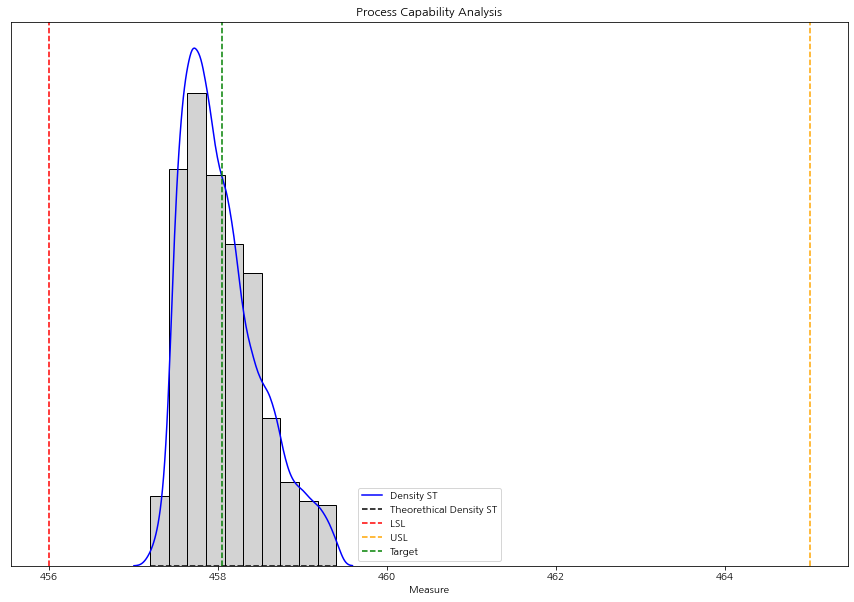

In [33]:
# Blue Wavelength 특성의 공정 능력

# Generate probability density function 
x = np.linspace((df4['WD_B'].min()), (df4['WD_B'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['WD_B'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['WD_B'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_WB, linestyle="--", color="red", label="LSL")
plt.axvline(USL_WB, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_WB, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [34]:
# Calculate Cp
Cp = (USL_WB-LSL_WB)/(6*np.std(df4['WD_B']))
# Calculate Cpk
Cpk = min((USL_WB-df4['WD_B'].mean())/(3*df4['WD_B'].std()), (df4['WD_B'].mean()-LSL_WB)/(3*df4['WD_B'].std()))
# Calculate z-value
z = min((USL_WB-df4['WD_B'].mean())/(df4['WD_B'].std()), (df4['WD_B'].mean()-LSL_WB)/(df4['WD_B'].std()))
# Get data summary statistics
num_samples = len(df4['WD_B'])
sample_mean = df4['WD_B'].mean()
sample_std = df4['WD_B'].std()
sample_max = df4['WD_B'].max()
sample_min = df4['WD_B'].min()
sample_median = np.median(df4['WD_B'])

# Get percentage of data points outside of specification limits
pct_below_LSL_WB = len(df4['WD_B'][df4['WD_B'] < LSL_WB])/len(df4['WD_B'])*100
pct_above_USL_WB = len(df4['WD_B'][df4['WD_B'] > USL_WB])/len(df4['WD_B'])*100

# Write .txt file with results
with open('process_results.txt', "w") as results:
    results.write("PROCESS CAPABILITY ANALYSIS")
    
    print("-----------------------------------")
    print(f"Specifications")
    print(f"Taget: {MEAN_WB}")
    print(f"LSL: {LSL_WB}")
    print(f"USL: {USL_WB}")    
    
    print("-----------------------------------")
    print(f"Indices")
    print(f"Cp: {round(Cp,2)}")
    print(f"Cpk: {round(Cpk,2)}")
    print(f"z: {round(z,2)}")
    
    print("-----------------------------------")
    print(f"Summary Statistics")
    print(f"Number of samples: {round(num_samples,2)}")
    print(f"Sample mean: {round(sample_mean,2)}")
    print(f"Sample std: {round(sample_std,2)}")
    print(f"Sample max: {round(sample_max,2)}")
    print(f"Sample min: {round(sample_min,2)}")
    print(f"Sample median: {round(sample_median,2)}")
    
    print(f"Percentage of data points below LSL: {round(pct_below_LSL_WB,2)}%")
    print(f"Percentage of data points above USL: {round(pct_above_USL_WB,2)}%")

-----------------------------------
Specifications
Taget: 458.0484776377625
LSL: 456.0
USL: 465.0
-----------------------------------
Indices
Cp: 3.28
Cpk: 1.49
z: 4.48
-----------------------------------
Summary Statistics
Number of samples: 18491
Sample mean: 458.05
Sample std: 0.46
Sample max: 459.4
Sample min: 457.2
Sample median: 458.0
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.0%


## Green Chip Sorting 공정 능력 cp, cpk

### Luminous Intensity _ Green

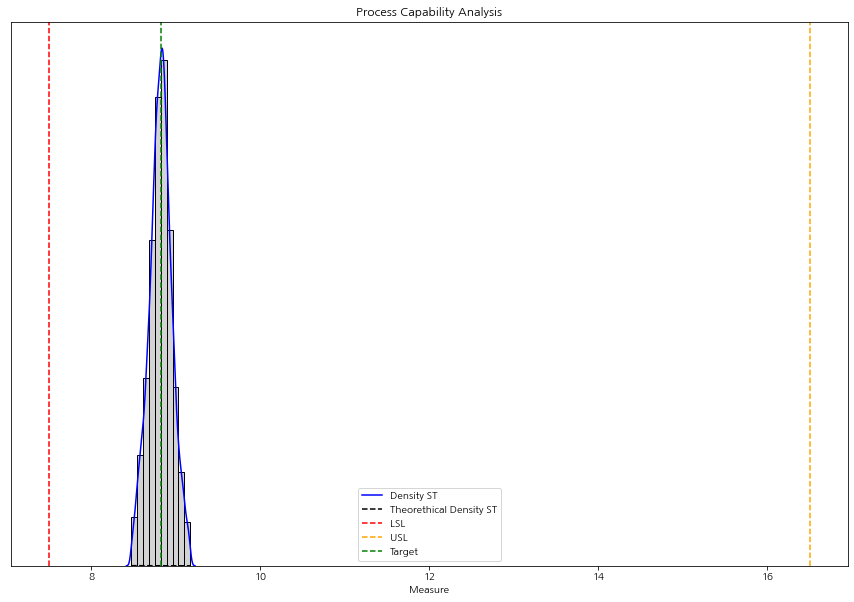

In [35]:
# Generate probability density function 
x = np.linspace((df4['IV_G'].min()), (df4['IV_G'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['IV_G'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['IV_G'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_IG, linestyle="--", color="red", label="LSL")
plt.axvline(USL_IG, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_IG, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [36]:
# Calculate Cp
Cp = (USL_IG-LSL_IG)/(6*np.std(df4['IV_G']))
# Calculate Cpk
Cpk = min((USL_IG-df4['IV_G'].mean())/(3*df4['IV_G'].std()), (df4['IV_G'].mean()-LSL_IG)/(3*df4['IV_G'].std()))
# Calculate z-value
z = min((USL_IG-df4['IV_G'].mean())/(df4['IV_G'].std()), (df4['IV_G'].mean()-LSL_IG)/(df4['IV_G'].std()))
# Get data summary statistics
num_samples = len(df4['IV_G'])
sample_mean = df4['IV_G'].mean()
sample_std = df4['IV_G'].std()
sample_max = df4['IV_G'].max()
sample_min = df4['IV_G'].min()
sample_median = np.median(df4['IV_G'])

# Get percentage of data points outside of specification limits
pct_below_LSL_IG = len(df4['IV_G'][df4['IV_G'] < LSL_IG])/len(df4['IV_G'])*100
pct_above_USL_IG = len(df4['IV_G'][df4['IV_G'] > USL_IG])/len(df4['IV_G'])*100

# Write .txt file with results
with open('process_results.txt', "w") as results:
    results.write("PROCESS CAPABILITY ANALYSIS\n")
    
    print("-----------------------------------")
    print(f"Specifications")
    print(f"Taget: {MEAN_IG}")
    print(f"LSL: {LSL_IG}")
    print(f"USL: {USL_IG}")    
    
    print("-----------------------------------")
    print(f"Indices")
    print(f"Cp: {round(Cp,2)}")
    print(f"Cpk: {round(Cpk,2)}")
    print(f"z: {round(z,2)}")
    
    print("-----------------------------------")
    print(f"Summary Statistics")
    print(f"Number of samples: {round(num_samples,2)}")
    print(f"Sample mean: {round(sample_mean,2)}")
    print(f"Sample std: {round(sample_std,2)}")
    print(f"Sample max: {round(sample_max,2)}")
    print(f"Sample min: {round(sample_min,2)}")
    print(f"Sample median: {round(sample_median,2)}")
    
    print(f"Percentage of data points below LSL: {round(pct_below_LSL_IG,2)}%")
    print(f"Percentage of data points above USL: {round(pct_above_USL_IG,2)}%")

-----------------------------------
Specifications
Taget: 8.822126007246789
LSL: 7.5
USL: 16.5
-----------------------------------
Indices
Cp: 11.31
Cpk: 3.32
z: 9.97
-----------------------------------
Summary Statistics
Number of samples: 18491
Sample mean: 8.82
Sample std: 0.13
Sample max: 9.17
Sample min: 8.47
Sample median: 8.83
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.0%


### Forward Voltage _ Green

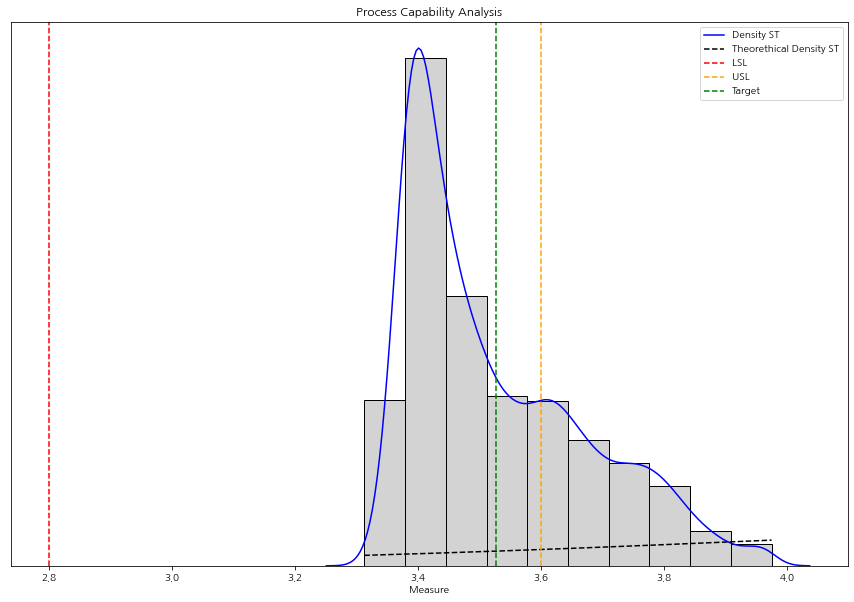

In [37]:
# Blue VF 특성의 공정 능력

# Generate probability density function 
x = np.linspace((df4['VF_G'].min()), (df4['VF_G'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['VF_G'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['VF_G'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_VG, linestyle="--", color="red", label="LSL")
plt.axvline(USL_VG, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_VG, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [38]:
# Calculate Cp
Cp = (USL_VG-LSL_VG)/(6*np.std(df4['VF_G']))
# Calculate Cpk
Cpk = min((USL_VG-df4['VF_G'].mean())/(3*df4['VF_G'].std()), (df4['VF_G'].mean()-LSL_VG)/(3*df4['VF_G'].std()))
# Calculate z-value
z = min((USL_VG-df4['VF_G'].mean())/(df4['VF_G'].std()), (df4['VF_G'].mean()-LSL_VG)/(df4['VF_G'].std()))

# Get data summary statistics
num_samples = len(df4['VF_G'])
sample_mean = df4['VF_G'].mean()
sample_std = df4['VF_G'].std()
sample_max = df4['VF_G'].max()
sample_min = df4['VF_G'].min()
sample_median = np.median(df4['VF_G'])

# Get percentage of data points outside of specification limits
pct_below_LSL_VG = len(df4['VF_G'][df4['VF_G'] < LSL_VG])/len(df4['VF_G'])*100
pct_above_USL_VG = len(df4['VF_G'][df4['VF_G'] > USL_VG])/len(df4['VF_G'])*100

# Write .txt file with results
with open('process_results.txt', "w") as results:
    results.write("PROCESS CAPABILITY ANALYSIS")
    
    print("-----------------------------------")
    print(f"Specifications")
    print(f"Taget: {MEAN_VG}")
    print(f"LSL: {LSL_VG}")
    print(f"USL: {USL_VG}")    
    
    print("-----------------------------------")
    print(f"Indices")
    print(f"Cp: {round(Cp,2)}")
    print(f"Cpk: {round(Cpk,2)}")
    print(f"z: {round(z,2)}")
    
    print("-----------------------------------")
    print(f"Summary Statistics")
    print(f"Number of samples: {round(num_samples,2)}")
    print(f"Sample mean: {round(sample_mean,2)}")
    print(f"Sample std: {round(sample_std,2)}")
    print(f"Sample max: {round(sample_max,2)}")
    print(f"Sample min: {round(sample_min,2)}")
    print(f"Sample median: {round(sample_median,2)}")
    
    print(f"Percentage of data points below LSL: {round(pct_below_LSL_VG,2)}%")
    print(f"Percentage of data points above USL: {round(pct_above_USL_VG,2)}%")

-----------------------------------
Specifications
Taget: 3.526999134714189
LSL: 2.8
USL: 3.6
-----------------------------------
Indices
Cp: 0.91
Cpk: 0.17
z: 0.5
-----------------------------------
Summary Statistics
Number of samples: 18491
Sample mean: 3.53
Sample std: 0.15
Sample max: 3.98
Sample min: 3.31
Sample median: 3.48
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 28.82%


### Wavelenght _ Green

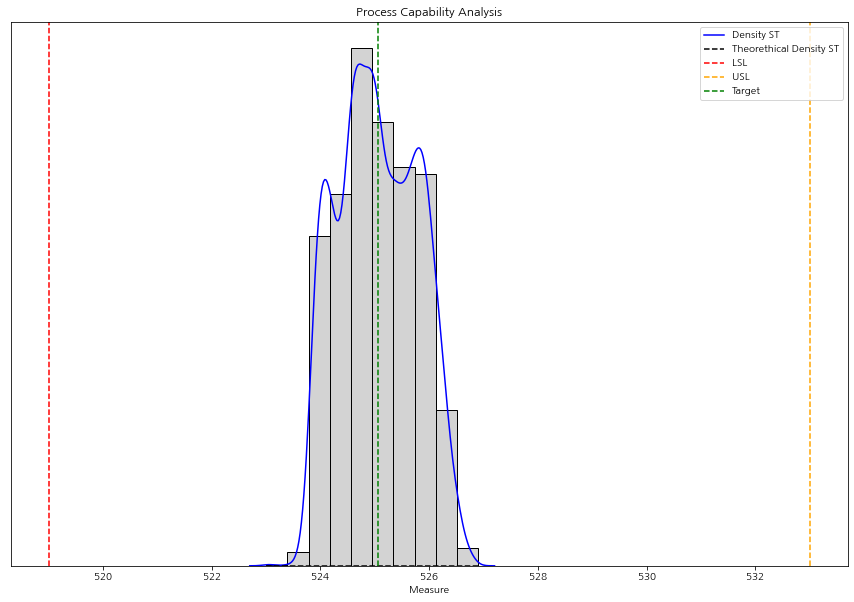

In [39]:
# Blue Wavelength 특성의 공정 능력

# Generate probability density function 
x = np.linspace((df4['WD_G'].min()), (df4['WD_G'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['WD_G'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['WD_G'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_WG, linestyle="--", color="red", label="LSL")
plt.axvline(USL_WG, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_WG, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [40]:
# Calculate Cp
Cp = (USL_WG-LSL_WG)/(6*np.std(df4['WD_G']))
# Calculate Cpk
Cpk = min((USL_WG-df4['WD_G'].mean())/(3*df4['WD_G'].std()), (df4['WD_G'].mean()-LSL_WG)/(3*df4['WD_G'].std()))
# Calculate z-value
z = min((USL_WG-df4['WD_G'].mean())/(df4['WD_G'].std()), (df4['WD_G'].mean()-LSL_WG)/(df4['WD_G'].std()))
# Get data summary statistics
num_samples = len(df4['WD_G'])
sample_mean = df4['WD_G'].mean()
sample_std = df4['WD_G'].std()
sample_max = df4['WD_G'].max()
sample_min = df4['WD_G'].min()
sample_median = np.median(df4['WD_G'])

# Get percentage of data points outside of specification limits
pct_below_LSL_WG = len(df4['WD_G'][df4['WD_G'] < LSL_WG])/len(df4['WD_G'])*100
pct_above_USL_WG = len(df4['WD_G'][df4['WD_G'] > USL_WG])/len(df4['WD_G'])*100

# Write .txt file with results
with open('process_results.txt', "w") as results:
    results.write("PROCESS CAPABILITY ANALYSIS")
    
    print("-----------------------------------")
    print(f"Specifications")
    print(f"Taget: {MEAN_WG}")
    print(f"LSL: {LSL_WG}")
    print(f"USL: {USL_WG}")    
    
    print("-----------------------------------")
    print(f"Indices")
    print(f"Cp: {round(Cp,2)}")
    print(f"Cpk: {round(Cpk,2)}")
    print(f"z: {round(z,2)}")
    
    print("-----------------------------------")
    print(f"Summary Statistics")
    print(f"Number of samples: {round(num_samples,2)}")
    print(f"Sample mean: {round(sample_mean,2)}")
    print(f"Sample std: {round(sample_std,2)}")
    print(f"Sample max: {round(sample_max,2)}")
    print(f"Sample min: {round(sample_min,2)}")
    print(f"Sample median: {round(sample_median,2)}")
    
    print(f"Percentage of data points below LSL: {round(pct_below_LSL_WG,2)}%")
    print(f"Percentage of data points above USL: {round(pct_above_USL_WG,2)}%")

-----------------------------------
Specifications
Taget: 525.0587637228889
LSL: 519.0
USL: 533.0
-----------------------------------
Indices
Cp: 3.25
Cpk: 2.81
z: 8.43
-----------------------------------
Summary Statistics
Number of samples: 18491
Sample mean: 525.06
Sample std: 0.72
Sample max: 526.9
Sample min: 523.0
Sample median: 525.0
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.0%


## Red Chip Sorting 공정 능력 cp, cpk

### Luminous Intensity _ Red

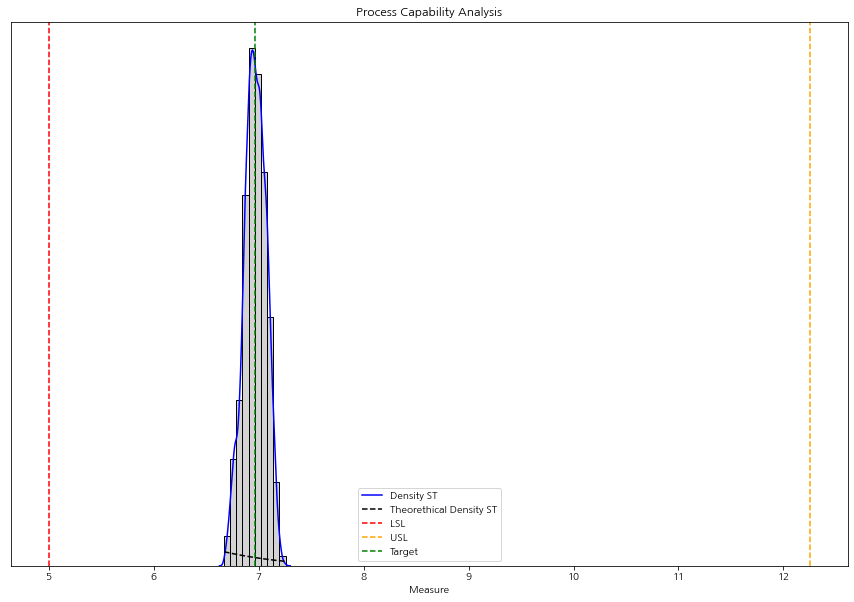

In [41]:
# Generate probability density function 
x = np.linspace((df4['IV_R'].min()), (df4['IV_R'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['IV_R'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['IV_R'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_IR, linestyle="--", color="red", label="LSL")
plt.axvline(USL_IR, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_IR, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [42]:
# Calculate Cp
Cp = (USL_IR-LSL_IR)/(6*np.std(df4['IV_R']))
# Calculate Cpk
Cpk = min((USL_IR-df4['IV_R'].mean())/(3*df4['IV_R'].std()), (df4['IV_R'].mean()-LSL_IR)/(3*df4['IV_R'].std()))
# Calculate z-value
z = min((USL_IR-df4['IV_R'].mean())/(df4['IV_R'].std()), (df4['IV_R'].mean()-LSL_IR)/(df4['IV_R'].std()))
# Get data summary statistics
num_samples = len(df4['IV_R'])
sample_mean = df4['IV_R'].mean()
sample_std = df4['IV_R'].std()
sample_max = df4['IV_R'].max()
sample_min = df4['IV_R'].min()
sample_median = np.median(df4['IV_B'])

# Get percentage of data points outside of specification limits
pct_below_LSL_IR = len(df4['IV_R'][df4['IV_R'] < LSL_IR])/len(df4['IV_R'])*100
pct_above_USL_IR = len(df4['IV_R'][df4['IV_R'] > USL_IR])/len(df4['IV_R'])*100

# Write .txt file with results
with open('process_results.txt', "w") as results:
    results.write("PROCESS CAPABILITY ANALYSIS\n")
    
    print("-----------------------------------")
    print(f"Specifications")
    print(f"Taget: {MEAN_IR}")
    print(f"LSL: {LSL_IR}")
    print(f"USL: {USL_IR}")    
    
    print("-----------------------------------")
    print(f"Indices")
    print(f"Cp: {round(Cp,2)}")
    print(f"Cpk: {round(Cpk,2)}")
    print(f"z: {round(z,2)}")
    
    print("-----------------------------------")
    print(f"Summary Statistics")
    print(f"Number of samples: {round(num_samples,2)}")
    print(f"Sample mean: {round(sample_mean,2)}")
    print(f"Sample std: {round(sample_std,2)}")
    print(f"Sample max: {round(sample_max,2)}")
    print(f"Sample min: {round(sample_min,2)}")
    print(f"Sample median: {round(sample_median,2)}")
    
    print(f"Percentage of data points below LSL: {round(pct_below_LSL_IR,2)}%")
    print(f"Percentage of data points above USL: {round(pct_above_USL_IR,2)}%")

-----------------------------------
Specifications
Taget: 6.9650031907414345
LSL: 5.0
USL: 12.25
-----------------------------------
Indices
Cp: 11.68
Cpk: 6.33
z: 19.0
-----------------------------------
Summary Statistics
Number of samples: 18491
Sample mean: 6.97
Sample std: 0.1
Sample max: 7.26
Sample min: 6.67
Sample median: 2.12
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.0%


### Forward Voltage _ Red

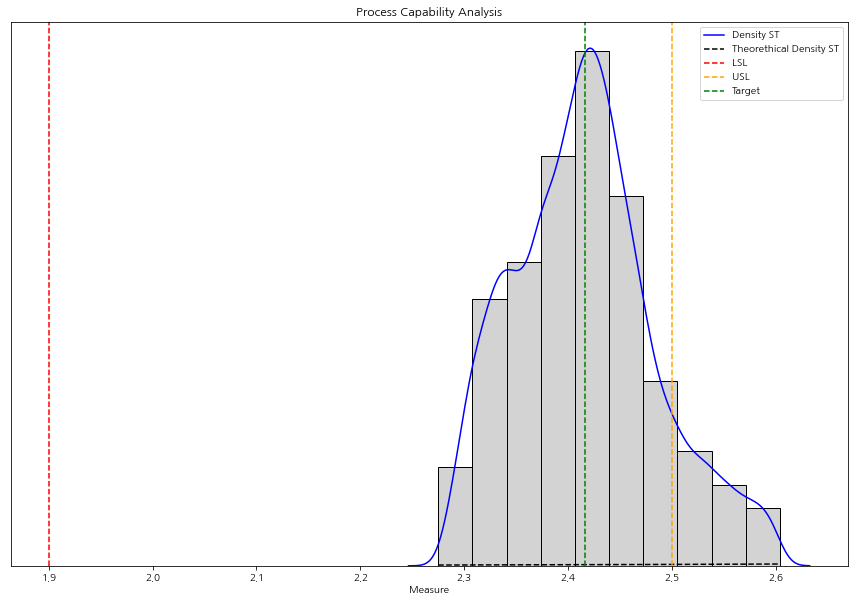

In [43]:
# Blue VF 특성의 공정 능력

# Generate probability density function 
x = np.linspace((df4['VF_R'].min()), (df4['VF_R'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['VF_R'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['VF_R'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_VR, linestyle="--", color="red", label="LSL")
plt.axvline(USL_VR, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_VR, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [44]:
# Calculate Cp
Cp = (USL_VR-LSL_VR)/(6*np.std(df4['VF_R']))
# Calculate Cpk
Cpk = min((USL_VR-df4['VF_R'].mean())/(3*df4['VF_R'].std()), (df4['VF_R'].mean()-LSL_VR)/(3*df4['VF_R'].std()))
# Calculate z-value
z = min((USL_VR-df4['VF_R'].mean())/(df4['VF_R'].std()), (df4['VF_R'].mean()-LSL_VR)/(df4['VF_R'].std()))

# Get data summary statistics
num_samples = len(df4['VF_R'])
sample_mean = df4['VF_R'].mean()
sample_std = df4['VF_R'].std()
sample_max = df4['VF_R'].max()
sample_min = df4['VF_R'].min()
sample_median = np.median(df4['VF_R'])

# Get percentage of data points outside of specification limits
pct_below_LSL_VR = len(df4['VF_R'][df4['VF_R'] < LSL_VR])/len(df4['VF_R'])*100
pct_above_USL_VR = len(df4['VF_R'][df4['VF_R'] > USL_VR])/len(df4['VF_R'])*100

# Write .txt file with results
with open('process_results.txt', "w") as results:
    results.write("PROCESS CAPABILITY ANALYSIS")
    
    print("-----------------------------------")
    print(f"Specifications")
    print(f"Taget: {MEAN_VR}")
    print(f"LSL: {LSL_VR}")
    print(f"USL: {USL_VR}")    
    
    print("-----------------------------------")
    print(f"Indices")
    print(f"Cp: {round(Cp,2)}")
    print(f"Cpk: {round(Cpk,2)}")
    print(f"z: {round(z,2)}")
    
    print("-----------------------------------")
    print(f"Summary Statistics")
    print(f"Number of samples: {round(num_samples,2)}")
    print(f"Sample mean: {round(sample_mean,2)}")
    print(f"Sample std: {round(sample_std,2)}")
    print(f"Sample max: {round(sample_max,2)}")
    print(f"Sample min: {round(sample_min,2)}")
    print(f"Sample median: {round(sample_median,2)}")
    
    print(f"Percentage of data points below LSL: {round(pct_below_LSL_VR,2)}%")
    print(f"Percentage of data points above USL: {round(pct_above_USL_VR,2)}%")

-----------------------------------
Specifications
Taget: 2.4159841544535112
LSL: 1.9
USL: 2.5
-----------------------------------
Indices
Cp: 1.47
Cpk: 0.41
z: 1.23
-----------------------------------
Summary Statistics
Number of samples: 18491
Sample mean: 2.42
Sample std: 0.07
Sample max: 2.6
Sample min: 2.27
Sample median: 2.42
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 11.44%


### Wavelenght _ Red

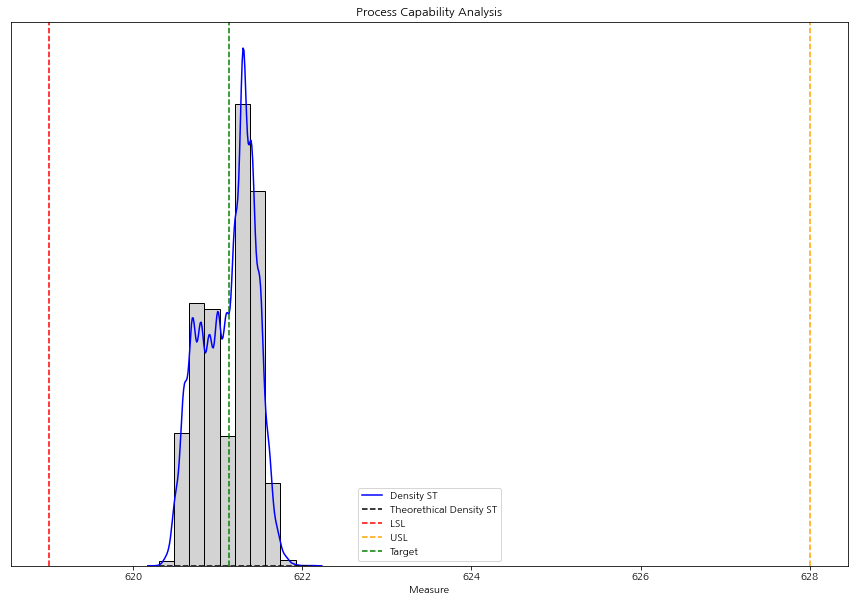

In [45]:
# Blue Wavelength 특성의 공정 능력

# Generate probability density function 
x = np.linspace((df4['WD_R'].min()), (df4['WD_R'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['WD_R'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['WD_R'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_WR, linestyle="--", color="red", label="LSL")
plt.axvline(USL_WR, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_WR, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [46]:
# Calculate Cp
Cp = (USL_WR-LSL_WR)/(6*np.std(df4['WD_R']))
# Calculate Cpk
Cpk = min((USL_WR-df4['WD_R'].mean())/(3*df4['WD_R'].std()), (df4['WD_R'].mean()-LSL_WR)/(3*df4['WD_R'].std()))
# Calculate z-value
z = min((USL_WR-df4['WD_R'].mean())/(df4['WD_R'].std()), (df4['WD_R'].mean()-LSL_WR)/(df4['WD_R'].std()))
# Get data summary statistics
num_samples = len(df4['WD_R'])
sample_mean = df4['WD_R'].mean()
sample_std = df4['WD_R'].std()
sample_max = df4['WD_R'].max()
sample_min = df4['WD_R'].min()
sample_median = np.median(df4['WD_R'])

# Get percentage of data points outside of specification limits
pct_below_LSL_WR = len(df4['WD_R'][df4['WD_R'] < LSL_WR])/len(df4['WD_R'])*100
pct_above_USL_WR = len(df4['WD_R'][df4['WD_R'] > USL_WR])/len(df4['WD_R'])*100

# Write .txt file with results
with open('process_results.txt', "w") as results:
    results.write("PROCESS CAPABILITY ANALYSIS")
    
    print("-----------------------------------")
    print(f"Specifications")
    print(f"Taget: {MEAN_WR}")
    print(f"LSL: {LSL_WR}")
    print(f"USL: {USL_WR}")    
    
    print("-----------------------------------")
    print(f"Indices")
    print(f"Cp: {round(Cp,2)}")
    print(f"Cpk: {round(Cpk,2)}")
    print(f"z: {round(z,2)}")
    
    print("-----------------------------------")
    print(f"Summary Statistics")
    print(f"Number of samples: {round(num_samples,2)}")
    print(f"Sample mean: {round(sample_mean,2)}")
    print(f"Sample std: {round(sample_std,2)}")
    print(f"Sample max: {round(sample_max,2)}")
    print(f"Sample min: {round(sample_min,2)}")
    print(f"Sample median: {round(sample_median,2)}")
    
    print(f"Percentage of data points below LSL: {round(pct_below_LSL_WR,2)}%")
    print(f"Percentage of data points above USL: {round(pct_above_USL_WR,2)}%")

-----------------------------------
Specifications
Taget: 621.1268509004966
LSL: 619.0
USL: 628.0
-----------------------------------
Indices
Cp: 4.89
Cpk: 2.31
z: 6.94
-----------------------------------
Summary Statistics
Number of samples: 18491
Sample mean: 621.13
Sample std: 0.31
Sample max: 622.1
Sample min: 620.3
Sample median: 621.2
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.0%
